# PART 1. THEORY

a)

$$\tilde{D}_h - f'(0)= \frac{f(h) + \delta f(h) - f(-h) - \delta f(-h)}{2h} = \frac{f(h)-f(-h)}{2h} + \frac{\delta f(h) - \delta f(-h)}{2h} - f'(0) \quad \forall 0<h<a$$

So we want to prove that: $$\frac{f(h)-f(-h)}{2h} - f'(0) = \frac{h^2}{6}f'''(\xi)$$ for some $$\xi \in (-h,h)$$

Note that $\forall h \in (-a,a), \exists \xi_1 \in (-a,-|h|) $ and $\xi_2 \in (|h|,a)$, Taylor's theorem apply, and

$$f(h) = f(0) + h*f'(0) + h^2*\frac{f''(0)}{2} + h^3*\frac{f'''(\xi_2)}{6}$$

$$f(-h) = f(0) - h*f'(0) + h^2*\frac{f''(0)}{2} - h^3*\frac{f'''(\xi_1)}{6}$$

So $$\frac{f(h)-f(-h)}{2h} - f'(0) = \frac{2h*f'(0) + \frac{h^3}{6}*(f'''(\xi_1) + f'''(\xi_2))}{2h} - f'(0)\\ = \frac{h^2}{6}*\frac{(f'''(\xi_1) + f'''(\xi_2))}{2}$$

But $$\frac{(f'''(\xi_1) + f'''(\xi_2))}{2} = f'''(\xi)$$ for some $\xi \in (\xi_1,\xi_2)$ by the Intermediate Value Theorem as $f'''$ is continuous since $f$ is $C^3$.

We obtain that $\exists \xi \in (-h,h)$ such that $\forall 0<h<a$: $$\tilde{D}_h - f'(0)= \frac{h^2}{6} f'''(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}$$

b) 

$$\mid\tilde{D}_h - f'(0)\mid= \mid\frac{h^2}{6} f'''(\xi) + \frac{\delta f(h) - \delta f(-h)}{2h}\mid$$
$$ \leqslant\mid\frac{h^2}{6} f'''(\xi) \mid+ \mid\frac{\delta f(h) - \delta f(-h)}{2h}\mid$$
$$ \leqslant\frac{h^2}{6} \mid f'''(\xi) \mid+ \frac{\mid\delta f(h)\mid + \mid\delta f(-h)\mid}{2h}$$
$$ \leqslant\frac{h^2}{6} M+ \frac{\epsilon + \epsilon}{2h}$$
$$=\frac{h^2}{6} M+ \frac{\epsilon}{h}$$
for $M=max_{-a \leqslant x \leqslant a} \mid f'''(x)\mid$ and since $h \in (-a,a)$

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.interpolate as sc
import scipy.special
import random
from PIL import Image

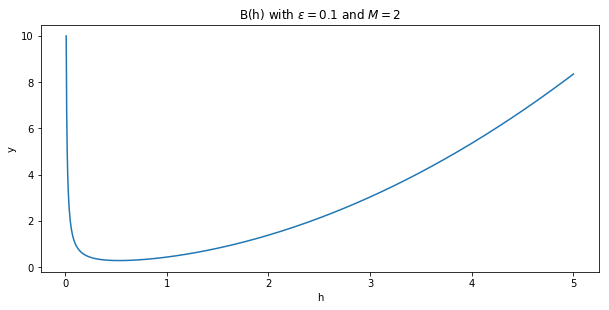

The minimum of the function is 0.28231.


In [47]:
def bound(h,eps,M):
    return eps/h + M*h*h/6

eps=.1
M=2
xlist = np.linspace(0.01,5,1000)
ylist = bound(xlist,eps,M)
min_bound=np.inf
for i in ylist:
    if (min_bound > i):
        min_bound = i
        
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.plot(xlist,ylist)

ax1.set_title(r'B(h) with $\epsilon=0.1$ and $M=2$')
ax1.set_xlabel('h')
ax1.set_ylabel('y')
plt.show()

print(r'The minimum of the function is %.5f.'%(min_bound))

To find the value of $h$ that minimizes $B(h)$, we have to find the critical point of $B(h)$.
$$B'(h) = \frac{Mh}{3} - \frac{\epsilon}{h^2} = 0$$
$$\Leftrightarrow Mh^3 = 3\epsilon$$
$$\Leftrightarrow h = \sqrt[3]{(\frac{3\epsilon}{M})}$$

As we can see on the graph, it is not good to take $h$ too small (ie smaller than $\sqrt[3]{(\frac{3\epsilon}{M})}$) as there is a vertical asymptote on the left of the minimum of $B(h)$ and hence, the bound becomes bigger, so we might loose precision.

# PART 2. LAB

I chose the arcsin function.
In the plots, I did the three methods for n=5.
For this function, we can see that the Lagrange polynomial is better for Chebyshev nodes than equally spaced nodes.
In the 3 cases, the oscillation is visible better on the edges (close from the endpoints of my interval [-1,1]).


In [48]:
def f(x):
    return np.arcsin(x)

def eq_nodes(a,b,n):
    return np.linspace(a,b,n)

def cheb_nodes(a,b,n):
    array = []
    for i in range(1,n+1):
        array = array + [np.cos((2*i-1)*np.pi/(2*n))]
    array = np.sort(array)
    return array

In [78]:
def lagrange_coef(xpoints,ypoints,n):
    vandermonde = []
    for i in range(0,n):
        sub = []
        for j in range(0,n):
            sub = sub + [pow(xpoints[i],j)]
        vandermonde = vandermonde + [sub]
    return np.flip(np.linalg.solve(np.matrix(vandermonde),ypoints),0)

def bernstein_coef(xpoints,ypoints,n):
    coef = []
    for i in range(0,n+1):
        coef = coef + [scipy.special.binom(n,i)*f(i/n)]
    return coef

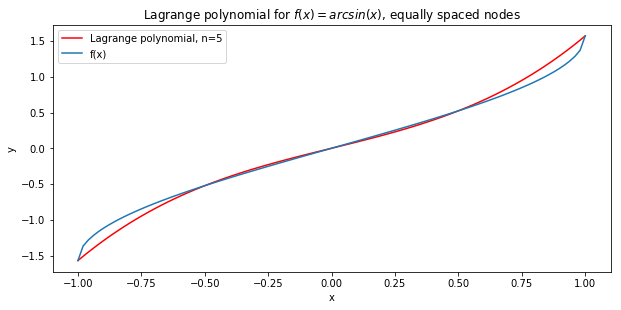

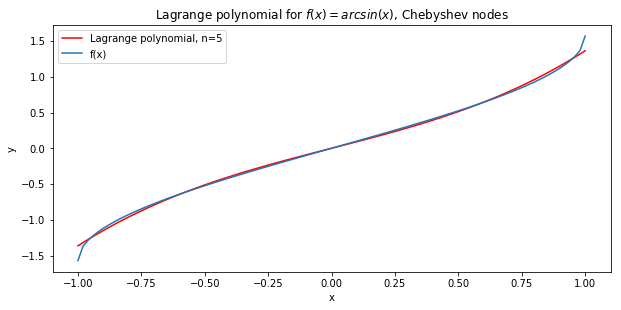

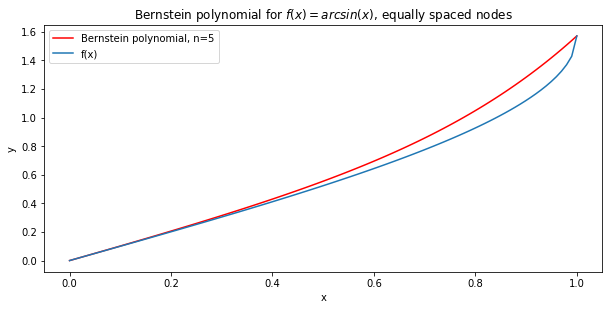

In [83]:
n=5
xpoints = eq_nodes(-1,1,n)
ypoints = []
for x in xpoints:
    ypoints = ypoints + [f(x)]
    
poly = lagrange_coef(xpoints, ypoints,n)
###plot the Lagrange polynomial for n=10
xlist = np.linspace(-1,1,100)
ylist = []
for i in xlist:
    value = 0
    degree = n - 1
    for j in poly:
        value = value + pow(i,degree)*j
        degree = degree - 1
    ylist = ylist + [value]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.plot(xlist,ylist,'r', label = 'Lagrange polynomial, n=5')

###plot the function
ylist = []
for i in xlist:
    ylist = ylist + [f(i)]
ax1.plot(xlist,ylist,label = 'f(x)')
plt.legend()
ax1.set_title(r'Lagrange polynomial for $f(x)=arcsin(x)$, equally spaced nodes')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

###Now we do the same, for the Chebyshev nodes
xpoints = cheb_nodes(-1,1,n)
ypoints = []
for x in xpoints:
    ypoints = ypoints + [f(x)]

poly = lagrange_coef(xpoints, ypoints,n)
###plot the Lagrange polynomial for n=10
xlist = np.linspace(-1,1,100)
ylist = []
for i in xlist:
    value = 0
    degree = n - 1
    for j in poly:
        value = value + pow(i,degree)*j
        degree = degree - 1
    ylist = ylist + [value]

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(211)
ax2.plot(xlist,ylist,'r', label = 'Lagrange polynomial, n=5')

###plot the function
ylist = []
for i in xlist:
    ylist = ylist + [f(i)]
ax2.plot(xlist,ylist,label = 'f(x)')
plt.legend()
ax2.set_title(r'Lagrange polynomial for $f(x)=arcsin(x)$, Chebyshev nodes')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

###Now we do the same, for the Bernstein polynomial
xpoints = eq_nodes(-1,1,n)
ypoints = []
for x in xpoints:
    ypoints = ypoints + [f(x)]

poly = bernstein_coef(xpoints, ypoints,n)
###plot the Lagrange polynomial for n=10
xlist = np.linspace(0,1,100)
ylist = []
for i in xlist:
    value = 0
    degree = 0
    for j in poly:
        value = value + pow(i,degree)*j*pow(1-i,n-degree)
        degree = degree + 1
    ylist = ylist + [value]

fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(211)
ax3.plot(xlist,ylist,'r', label = 'Bernstein polynomial, n=5')

###plot the function
ylist = []
for i in xlist:
    ylist = ylist + [f(i)]
ax3.plot(xlist,ylist,label = 'f(x)')
ax3.set_title(r'Bernstein polynomial for $f(x)=arcsin(x)$, equally spaced nodes')
plt.legend()
ax3.set_xlabel('x')
ax3.set_ylabel('y')
plt.show()

Here is the part that I was not sure we had to do: the investigation.
To show Runge's phenomenon, I computed the derivative of each polynomial Pn, took the absolute value of the maximum, and plotted it against n.
As expected, the function is increasing, as the polynomial have bigger oscillations when n increases.
Those 2 plots are for the Lagrange polynomials.

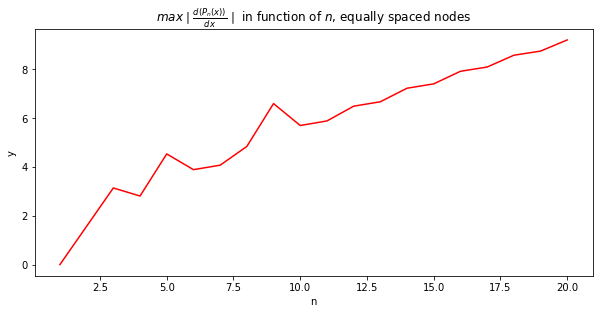

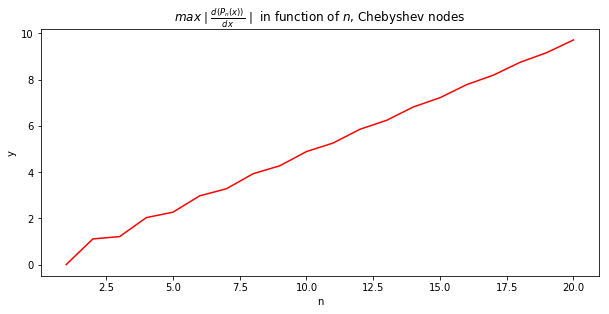

In [84]:
maximums = []
points = 20
for n in range(1,points+1):
    xpoints = eq_nodes(-1,1,n)
    ypoints = []
    for x in xpoints:
        ypoints = ypoints + [f(x)]
    poly = sc.lagrange(xpoints, ypoints)
    ###derivative of Lagrange polynomial
    xlist = np.linspace(-1,1,100)
    ylist = []
    for i in xlist:
        value = 0
        degree = n - 1
        for j in poly:
            if (degree > 0):
                value = value + pow(i,degree-1)*j*degree
            degree = degree - 1
        ylist = ylist + [np.abs(value)]
    maximums = maximums + [np.amax(ylist)]

xlist = np.linspace(1,points,20)
fig = plt.figure(figsize=(10,10))
ax4 = fig.add_subplot(211)
ax4.plot(xlist,maximums,'r')
ax4.set_title(r'$max\mid\frac{d(P_n(x))}{dx}\mid$ in function of $n$, equally spaced nodes')
ax4.set_xlabel('n')
ax4.set_ylabel('y')
plt.legend()
plt.show()

maximums = []
points = 20
for n in range(1,points+1):
    xpoints = cheb_nodes(-1,1,n)
    ypoints = []
    for x in xpoints:
        ypoints = ypoints + [f(x)]
    poly = sc.lagrange(xpoints, ypoints)
    ###derivative of Lagrange polynomial
    xlist = np.linspace(-1,1,100)
    ylist = []
    for i in xlist:
        value = 0
        degree = n - 1
        for j in poly:
            if (degree > 0):
                value = value + pow(i,degree-1)*j*degree
            degree = degree - 1
        ylist = ylist + [np.abs(value)]
    maximums = maximums + [np.amax(ylist)]

xlist = np.linspace(1,points,20)
fig = plt.figure(figsize=(10,10))
ax4 = fig.add_subplot(211)
ax4.plot(xlist,maximums,'r')
ax4.set_title(r'$max\mid\frac{d(P_n(x))}{dx}\mid$ in function of $n$, Chebyshev nodes')
ax4.set_xlabel('n')
ax4.set_ylabel('y')
plt.legend()
plt.show()